# LOGISTIC REGRESSION PROJECT
### Income Classification using Logistic Regression

In this project, we will be using a dataset containing census information from the 1994 Census database to create a logistic regression model that predicts whether or not a person makes more than $50,000.

Let’s get started!

Datasets
The original data set is available at the UCI Machine Learning Repository here.

The dataset has been loaded for you in script.py and saved as a DataFrame named df. Some of the input and output features of interest are:

age: continuous
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
sex: Female, Male
capital-gain: continuous
capital-loss: continuous
hours-per-week: continuous
native country: discrete
income: discrete, >50K, <=50K

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

#import codecademylib3
import matplotlib.pyplot as plt
import seaborn as sns


col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data',header = None, names = col_names)
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#Clean columns by stripping extra whitespace for columns of type "object"
for c in df.select_dtypes(include=['object']).columns:
    print(c)
    df[c] = df[c].str.strip()
print(df.head())
df.shape

In [87]:
#1. Check Class Imbalance
df['income'].value_counts()

#2. Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = ['age','capital-gain', 'capital-loss', 'hours-per-week', 'sex','race', 'hours-per-week', 'education']
X = df[feature_cols]

dummy = df[['workclass','education','marital-status', 'occupation','relationship','race','sex']]
corr1 = dummy.corr()

df_dummies = pd.get_dummies(df[['workclass','education','marital-status', 'occupation','relationship','race','sex']],drop_first=True)
print(df_dummies)


       workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                          0                    0                       0   
1                          0                    0                       0   
2                          0                    0                       0   
3                          0                    0                       0   
4                          0                    0                       0   
...                      ...                  ...                     ...   
32556                      0                    0                       0   
32557                      0                    0                       0   
32558                      0                    0                       0   
32559                      0                    0                       0   
32560                      0                    0                       0   

       workclass_Private  workclass_Self-emp-inc  workclass_Self-emp-not-in

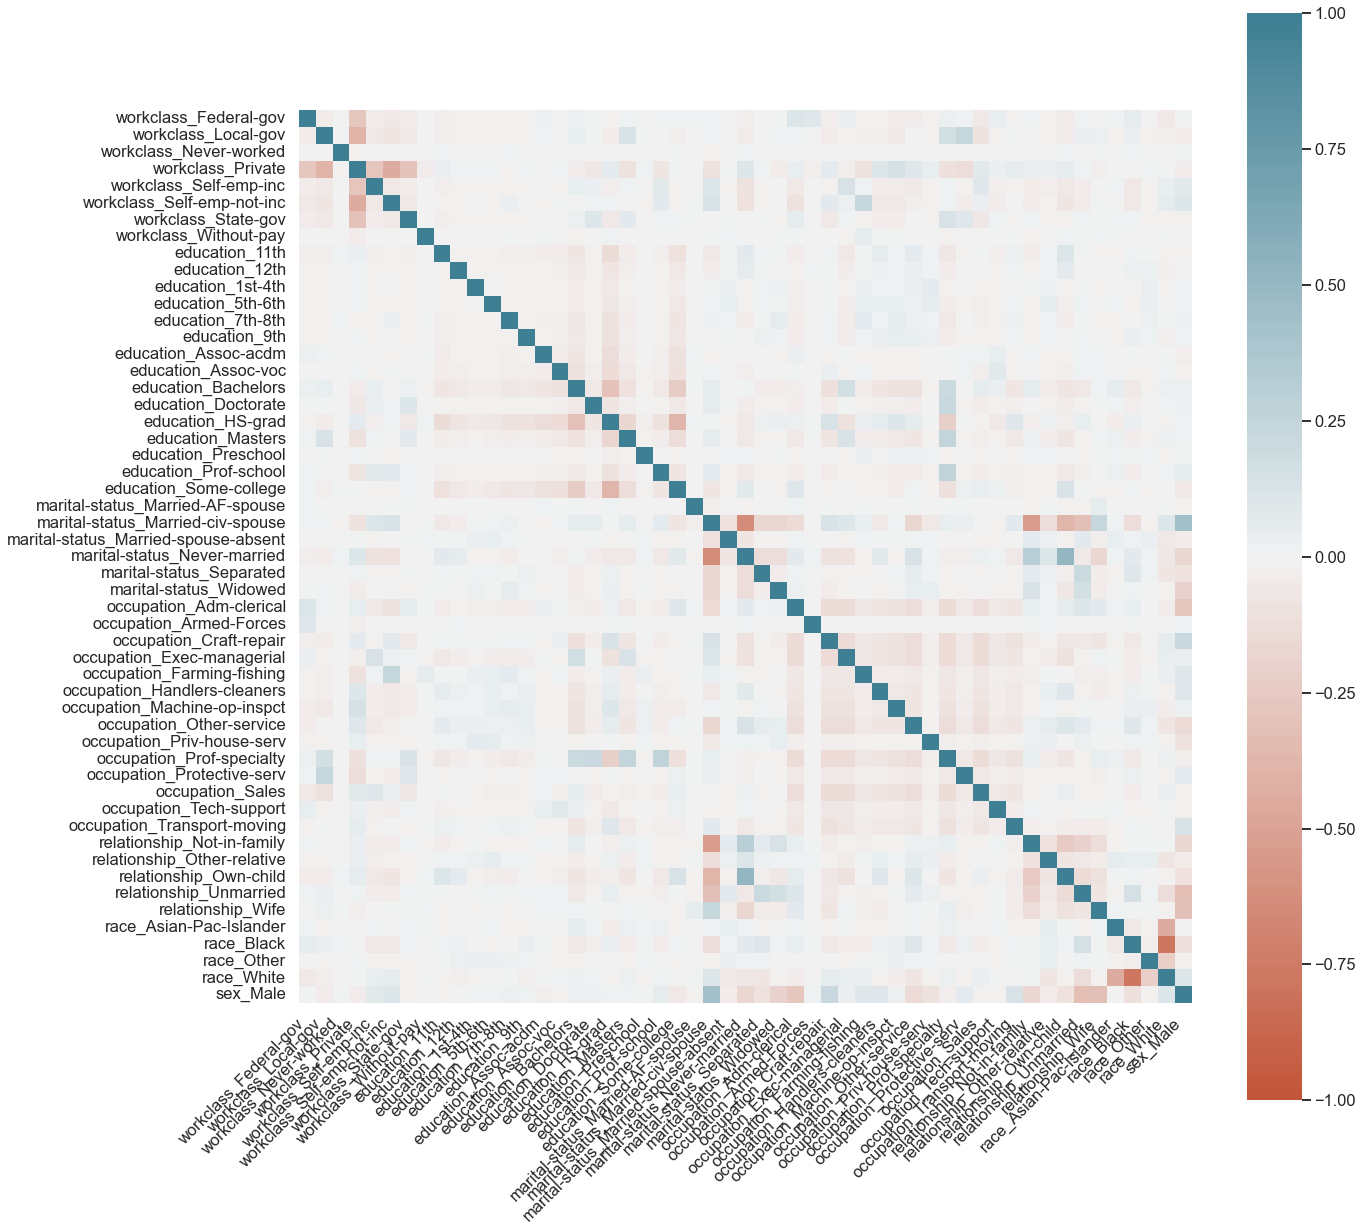

In [145]:
sns.set(rc={"figure.figsize":(20, 20)})
corr = df_dummies.corr()
with sns.plotting_context("talk"):
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200), # color code
    square=True
    )
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    )
    

#plt.figure(figsize=(40, 45))

In [96]:
#3. Check logistic regression assumption: feature correlation
#4. Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k
df['income'] = df['income'].map(lambda x: 1 if x=='>50K' else  0)
df['income']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [101]:
#5a. Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(df_dummies, df['income'], random_state=42, test_size=0.2)
log_reg = LogisticRegression(C=0.05, penalty='l1', solver='liblinear')
log_reg.fit(x_train,y_train)

LogisticRegression(C=0.05, penalty='l1', solver='liblinear')

In [115]:
df_dummies.columns

Index(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',

In [113]:
print(log_reg.coef_)

[[ 0.56520495  0.          0.          0.11438886  0.533061   -0.14084146
  -0.03963095  0.         -0.33894076  0.          0.         -0.16835912
  -0.52400933 -0.27597223  0.33332917  0.41215605  1.03922207  1.89701857
   0.          1.44359285  0.          1.92940046  0.28346782  0.
   1.53659033  0.         -0.69610279  0.          0.          0.
   0.          0.00924685  0.95224344 -0.52801304 -0.50228428 -0.30472801
  -0.78620603  0.          0.62439782  0.370706    0.38590349  0.47207501
   0.          0.         -0.41729823 -1.27150806 -0.175031    0.7844107
   0.          0.          0.          0.15706088  0.64643693]]


{'C': 0.05,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [104]:
print(log_reg.intercept_)

[-3.32061346]


In [106]:
y_pred = log_reg.predict(x_test)

In [109]:
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [108]:
y_test

14160    0
27048    0
28868    1
5667     0
7827     0
        ..
1338     0
24534    1
18080    1
10354    0
24639    0
Name: income, Length: 6513, dtype: int64

In [110]:
print(confusion_matrix(y_test,y_pred))

[[4600  342]
 [ 783  788]]


In [111]:
print(accuracy_score(y_test,y_pred))

0.8272685398433901


In [158]:
new = list(zip(['workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other', 'race_White',
       'sex_Male'],log_reg.coef_[0]))

In [159]:
new1 = pd.DataFrame(new,columns=['category','coefficients'])
new1

,category,coefficients
0,workclass_Federal-gov,0.565205
1,workclass_Local-gov,0.000000
2,workclass_Never-worked,0.000000
3,workclass_Private,0.114389
4,workclass_Self-emp-inc,0.533061
5,workclass_Self-emp-not-inc,-0.140841
6,workclass_State-gov,-0.039631
7,workclass_Without-pay,0.000000
8,education_11th,-0.338941
9,education_12th,0.000000


In [160]:
# Dropping Co-efficients with 0.0000 values as they don't add any value 
new1.drop(new1.index[new1['coefficients'] == 0.0000],inplace=True)

In [163]:
# Sorting co-efficients in ascending order 
new1 = new1.sort_values(by='coefficients',ascending=True)

In [164]:
new1

,category,coefficients
45,relationship_Own-child,-1.271508
36,occupation_Other-service,-0.786206
26,marital-status_Never-married,-0.696103
33,occupation_Farming-fishing,-0.528013
12,education_7th-8th,-0.524009
34,occupation_Handlers-cleaners,-0.502284
44,relationship_Other-relative,-0.417298
8,education_11th,-0.338941
35,occupation_Machine-op-inspct,-0.304728
13,education_9th,-0.275972


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='coefficients', ylabel='category'>

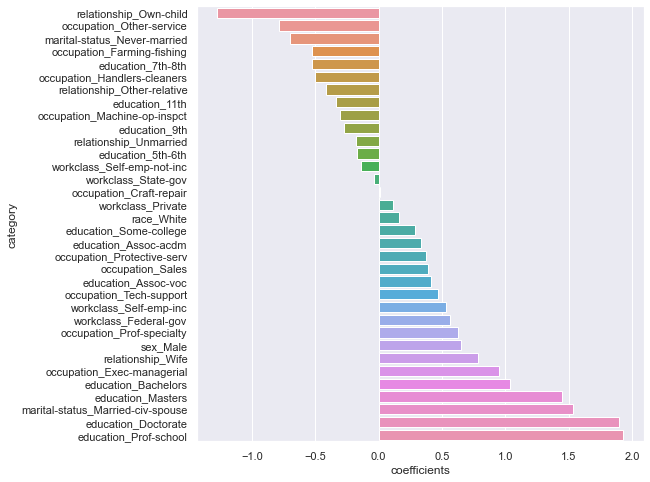

In [165]:
sns.set(rc={"figure.figsize":(8, 8)})
sns.barplot(new1['coefficients'].sort_values(ascending=True),new1['category'])

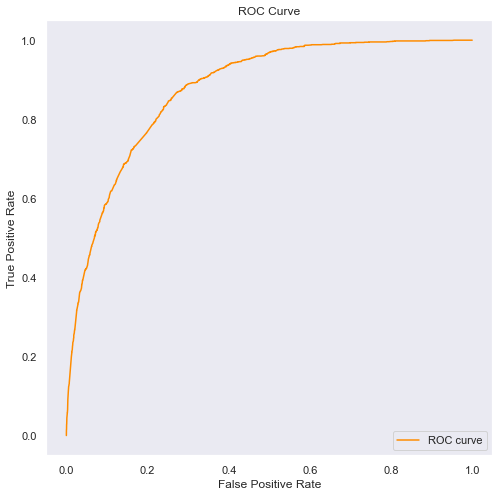

In [169]:
y_pred_prob = log_reg.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc="lower right")
plt.show()


In [168]:
##1. Find ROC_AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')


ROC AUC score: 0.8754773707276848
